 # Análisis de Precios de Viviendas en California
El objetivo es identificar los factores que influyen en los altos precios de las viviendas en California. Usarás un conjunto de datos con información sobre diversas propiedades.

La pregunta
Queremos predecir manualmente para un inversor qué zona es la mejor para invertir en bienes raíces en California
Puede haber muchos enfoques para ver esto. Vamos a ver uno de ellos. Es bastante básico

# Etapa 1: Exploracion y Limpieza de datos

1.1 Carga del conjunto de datos

In [12]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
%matplotlib inline 

#En esta sección realizamos la importación de las bibliotecas fundamentales para nuestro análisis:
- pandas: Para manipulación y análisis de datos
- numpy: Para cálculos numéricos
- matplotlib y seaborn: Para visualización de datos
- scipy.stats: Para análisis estadísticos

In [13]:
#Carga el archivo CSV para la lectura de los datos
ruta_archivo = "../datos/housing.csv"
df = pd.read_csv(ruta_archivo)

In [14]:
#Ver la información general del dataset para la lista de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Inspeccionar las primeras filas de la lista de datos
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Explicación de cada columna:

**longitud:** Longitud geográfica de la casa.

**latitud:** Latitud geográfica de la casa.

**housing_median_age :** Edad media de las casas en esa área.

**total_rooms :** Número total de habitaciones en la casa.

**total_bedrooms :** Número total de dormitorios (observa que hay algunos valores nulos, 20,433 de 20,640).

**población :** Población en el área de la casa.

**hogares :** Número de hogares en el área.
**median_rent :** Ingreso medio de los residentes en el área.

**median_house_value :** Valor medio de la casa.

**ocean_proximity :** Proximidad al océano (probablemente categorías como "cerca", "lejos", etc.).

# 1.2. Análisis Datos Flotantes

Ejecutamos este código para saber si hay valores nulos en las columnas:

In [16]:
#Identificacion de valores nulos en las columnas
print(df.isnull().sum())

#Filtrar filas con cualquier valor nulo
filas_nulas = df[df.isnull().any(axis=1)]
print(filas_nulas)

#Mostrar cuantas filas con valores nulos tienen en la columna
print(f"Total de filas con valores nulos: {len(filas_nulas)}")

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88

En este caso podemos ver que el porcentaje de filas que contienen valores nulos es menor al 5% por lo que eliminar estas filas no generaria un gran impacto, entonces:

In [17]:
# Eliminamos las filas con valores nulos
df = df.dropna()

# Verificamos que se hayan eliminado los valores nulos
print(df.isnull().sum())

filas_nulas = df[df.isnull().any(axis=1)]
# Verificamos la cantidad de filas y columnas después de la limpieza
print(f"Total de filas con valores nulos: {len(filas_nulas)}")

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
Total de filas con valores nulos: 0


1.3. Inspección de Estadísticas Básicas

**count:** Número de valores no nulos en cada columna.

**mean:** Promedio (media) de los valores en cada columna.

**std:** Desviación estándar, que mide la dispersión de los datos.

**min:** Valor mínimo.

**25%:** Primer cuartil (percentil 25), el valor que está por encima del 25% de los datos.

**50%:** Mediana (percentil 50), el valor central de los datos.

**75%:** Tercer cuartil (percentil 75), el valor que está por encima del 75% de los datos.

**max:** Valor máximo.

In [18]:
#Ejecutar este código para obtener estadísticas descriptivas de las columnas numéricas:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

# Cómo interpretarlo:

**Count**(Número de datos no nulos):
La columna total_bedrooms tiene menos valores (20433 en lugar de 20640), lo que indica que contiene valores nulos.

**Mean** (Media):

El ingreso promedio (median_income) es de 3.87 (quizás en miles de dólares).
La edad promedio de las casas (housing_median_age) es de 28.64 años.

**Min y Max:**

La cantidad *mínima* de habitaciones (total_rooms) es 2, pero el *máximo* es 39,320, lo que podría ser un outlier.


**Desviación estándar** (std):

La desviación estándar en total_rooms y total_bedrooms es alta, lo que indica una dispersión significativa en los datos.

**Cuartiles** (25%, 50%, 75%):

La mayoría de los valores (median_income) están entre 2.56 y 4.74, pero hay valores más extremos hacia el máximo (15.0).

# Etapa 2: Análisis Exploratorio de Datos (EDA)

# 2. Visualización de distribuciones de variables individuales

Comencemos analizando cómo se distribuyen las variables numéricas clave en el conjunto de datos.

**Distribución de la variable objetivo (median_house_value):**

Es importante entender cómo se distribuye la variable que intentaremos predecir.

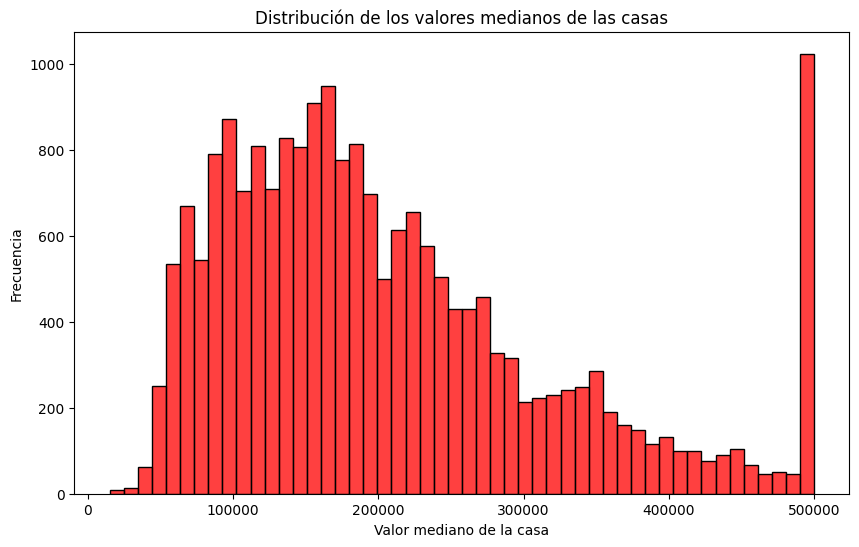

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, color='red')
plt.title('Distribución de los valores medianos de las casas')
plt.xlabel('Valor mediano de la casa')
plt.ylabel('Frecuencia')
plt.show()

# Cómo interpretarlo:
# La gráfica muestra la distribución de los valores medianos de las casas.
# La mayoría de los valores medianos de las casas se encuentran entre 100,000 y 200,000.
# Hay una pequeña cantidad de valores medianos de las casas que superan los 500,000.



### Explicacion del Grafico visto:

*Eje horizontal (x):* "Valor mediano de la casa" representa los diferentes precios medianos de las casas. Los valores van desde 0 hasta 500,000$ aproximadamente.

*Eje vertical (y):* "Frecuencia" indica cuántas casas tienen un valor mediano dentro de un rango determinado. Es decir, cuántas casas se venden por un precio similar.

*Barras:* Cada barra vertical representa un rango de precios medianos. La altura de la barra indica cuántas casas se vendieron dentro de ese rango de precios.

*Línea azul (KDE):* La línea azul superpuesta a las barras es una estimación de la densidad de kernel (KDE). Esta línea suaviza la distribución y nos da una mejor idea de la forma general de la distribución de los precios de las casas.

**Distribución de median_income:**

El ingreso medio puede ser un predictor significativo del valor de la vivienda.

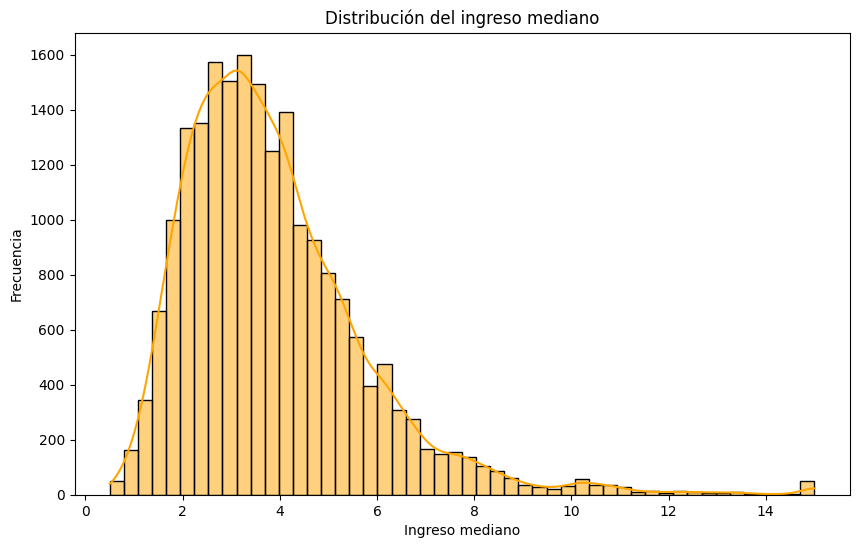

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_income'], bins=50, kde=True, color='orange')
plt.title('Distribución del ingreso mediano')
plt.xlabel('Ingreso mediano')
plt.ylabel('Frecuencia')
plt.show()

# 2.4 Análisis de correlaciones


El análisis de correlación nos ayuda a identificar relaciones entre las variables del conjunto de datos. Esto es importante para entender qué características tienen mayor influencia en el precio de las casas (median_house_value).

1. Seleccionar columnas numéricas
Primero, nos aseguramos de trabajar solo con las columnas numéricas, ya que la correlación no aplica a datos categóricos como ocean_proximity.

In [2]:
# Seleccionar solo las columnas numericas para el analisis
df_numerico = df.select_dtypes(include=["float64", "int64"])


NameError: name 'df' is not defined

2. Calcular la matriz de correlación
Generamos la matriz de correlación para estas columnas y la visualizamos con un mapa de calor.

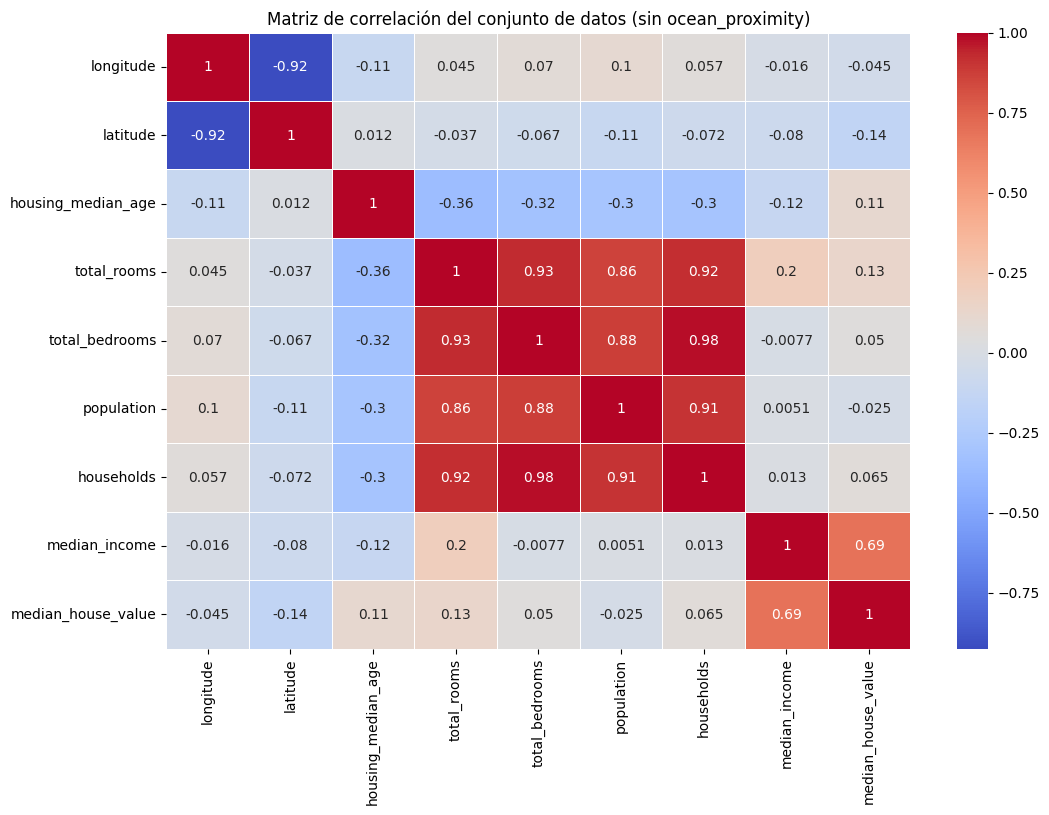

In [22]:
# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación del conjunto de datos (sin ocean_proximity)')
plt.show()

3. Incluir ocean_proximity en el análisis
Convertimos la columna categórica ocean_proximity en variables numéricas usando One-Hot Encoding. Esto nos permite analizar su relación con otras variables.

In [23]:
#Aplicar One-Hot Encoding a la columna ocean_proximity
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

#verifica las nuevas columnas
print(df_encoded.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


4. Recalcular la matriz de correlación con las variables codificadas
Ahora generamos una nueva matriz de correlación que incluye las columnas codificadas.

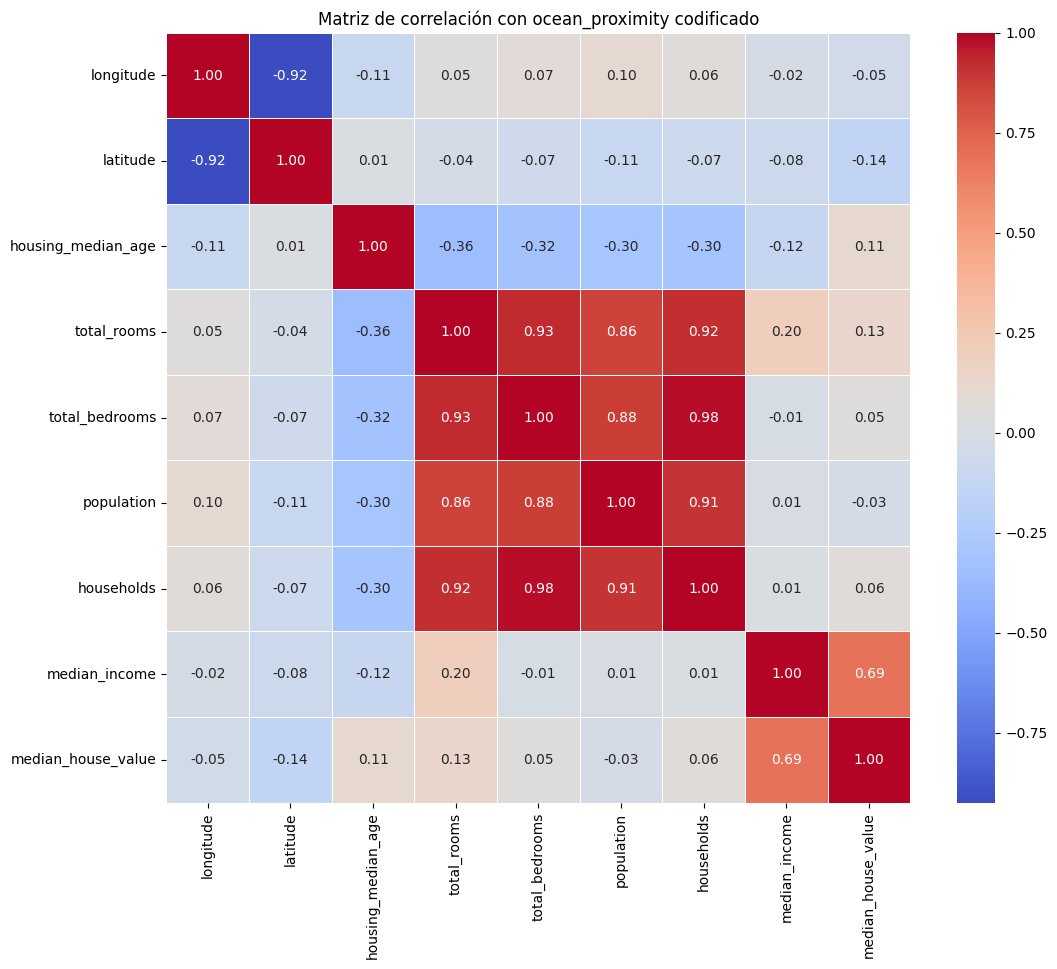

In [24]:
# Seleccionar columnas numéricas nuevamente después de One-Hot Encoding
numerical_columns_encoded = df_encoded.select_dtypes(include=["float64", "int64"])

# Calcular la nueva matriz de correlación
correlation_matrix_encoded = numerical_columns_encoded.corr()

# Mostrar la nueva matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación con ocean_proximity codificado")
plt.show()

2.5. Visualizacion de relaciones clave

Relación entre median_incomeymedian_house_value:

Creamos un gráfico de dispersión para analizar cómo los ingresos medianos afectan el valor de las viviendas.

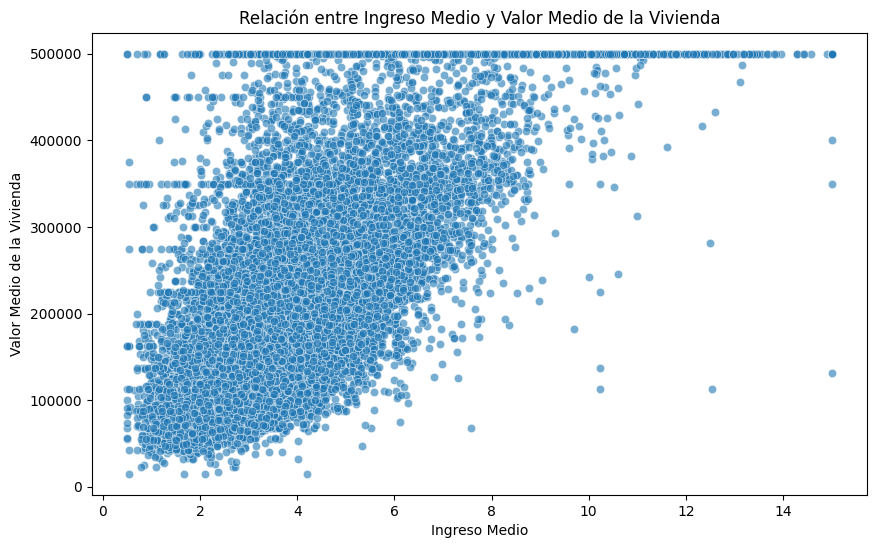

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.6)
plt.title('Relación entre Ingreso Medio y Valor Medio de la Vivienda')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

Relación entre housing_median_ageymedian_house_value:

Verificamos si la antigüedad de las viviendas influye en su valor.

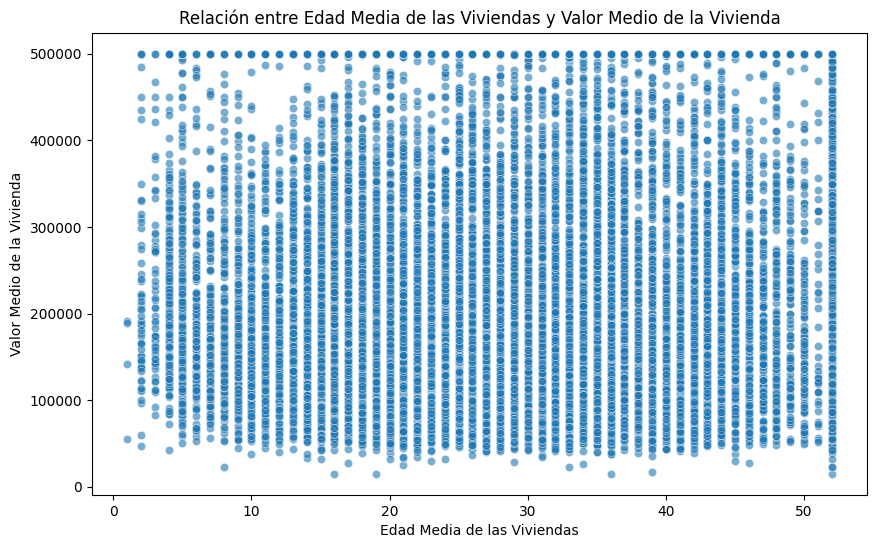

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='housing_median_age', y='median_house_value', alpha=0.6)
plt.title('Relación entre Edad Media de las Viviendas y Valor Medio de la Vivienda')
plt.xlabel('Edad Media de las Viviendas')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

Relación geográfica ( longitudey latitude):

Visualizar la distribución geográfica de las viviendas junto con sus valores.

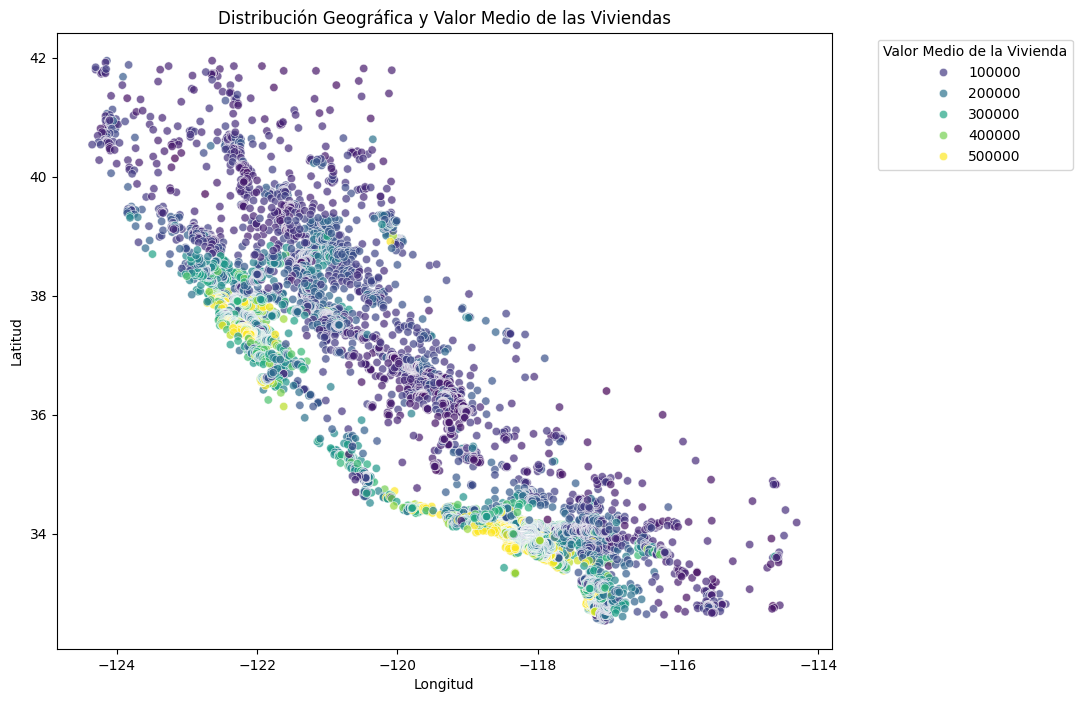

In [27]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='median_house_value',
    palette='viridis',
    alpha=0.7
)
plt.title('Distribución Geográfica y Valor Medio de las Viviendas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Valor Medio de la Vivienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Impacto deocean_proximity :

Analizar cómo la proximidad al océano afecta el valor de las viviendas.

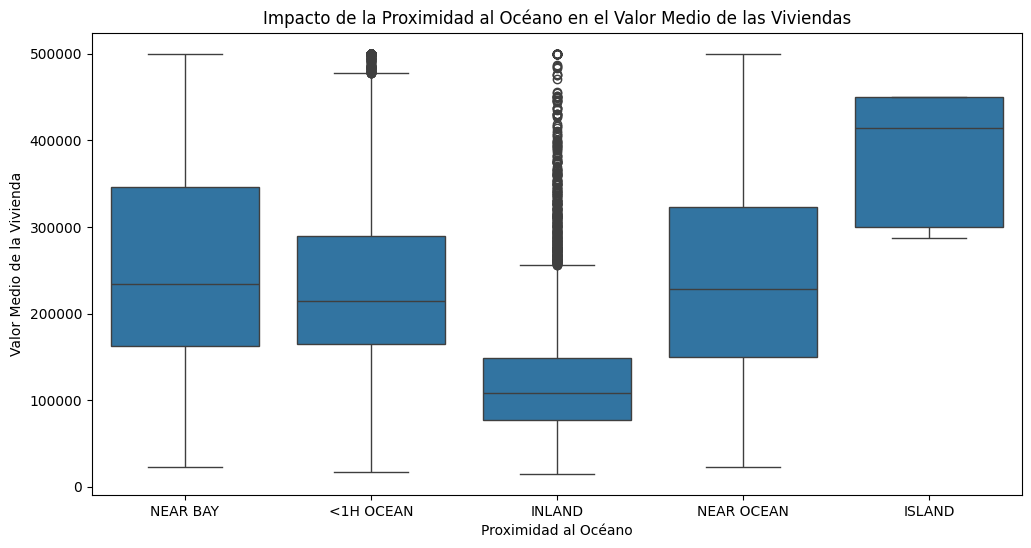

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Impacto de la Proximidad al Océano en el Valor Medio de las Viviendas')
plt.xlabel('Proximidad al Océano')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

# Explicación de los gráficos:

Ingreso medio vs. Valor medio de la vivienda : Este gráfico mostrará si hay un patrón claro entre el ingreso medio de los habitantes y el valor de las viviendas.

Edad media de la vivienda vs. Valor medio : Ayudará a identificar si las viviendas más antiguas o más nuevas tienen un mayor valor.

Distribución geográfica : Visualizará cómo los valores de las viviendas varían dependiendo de su ubicación geográfica.

Proximidad al océano : Mostrará cómo las diferentes categorías de proximidad al océano afectan el valor de las viviendas.

2.6: Distribuciones segmentadas y filtradas

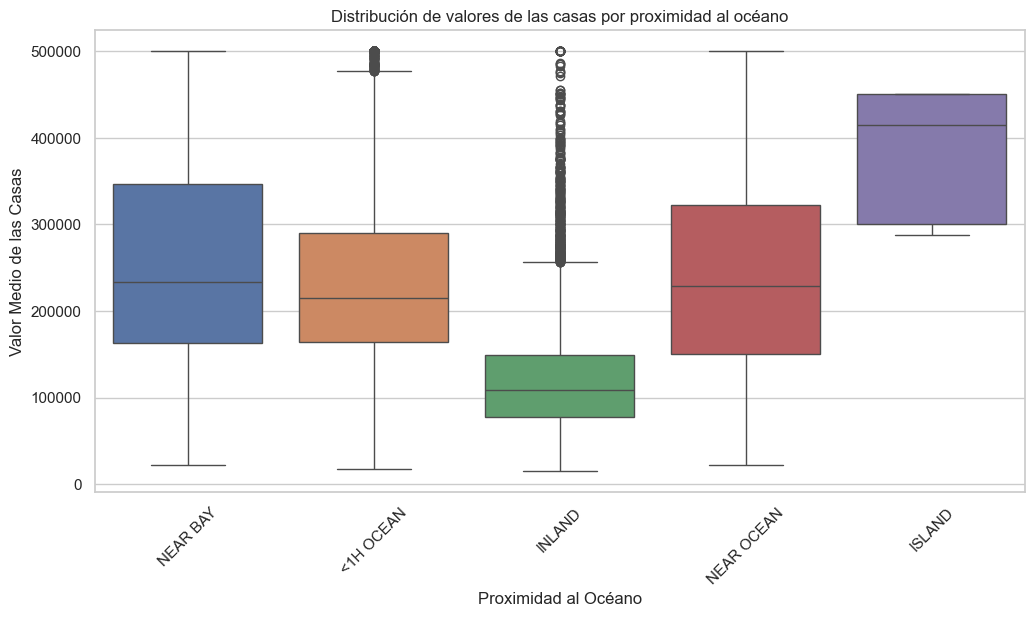

In [29]:
# Configuración de estilo
sns.set(style="whitegrid")

# Segmentación por ocean_proximity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', hue='ocean_proximity', dodge=False)

plt.title("Distribución de valores de las casas por proximidad al océano")
plt.xlabel("Proximidad al Océano")
plt.ylabel("Valor Medio de las Casas")
plt.xticks(rotation=45)
plt.show()

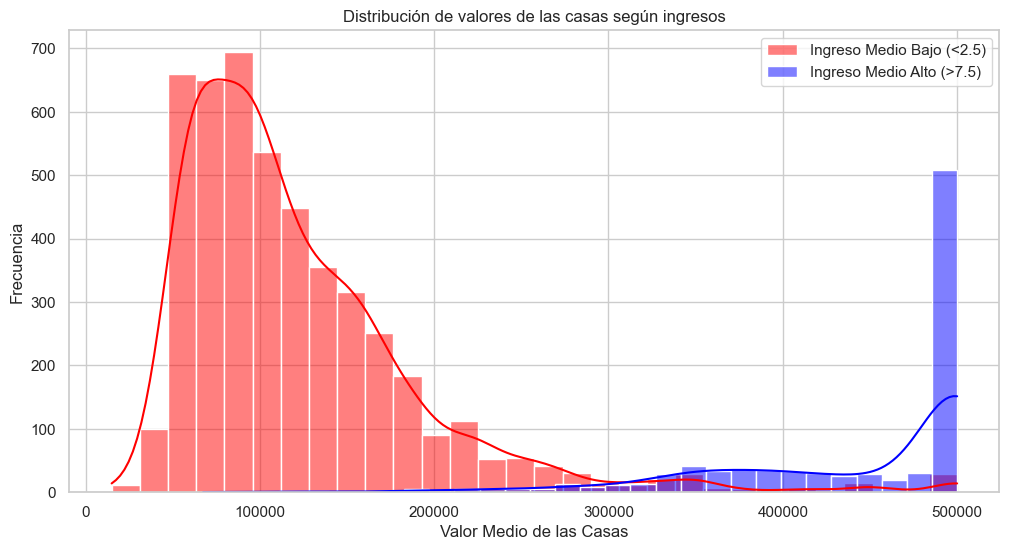

In [30]:
# Filtrar casas con ingresos medios bajos (< 2.5) y altos (> 7.5)
low_income = df[df['median_income'] < 2.5]
high_income = df[df['median_income'] > 7.5]

# Histogramas de valores medios de las casas
plt.figure(figsize=(12, 6))
sns.histplot(low_income['median_house_value'], bins=30, kde=True, color='red', label='Ingreso Medio Bajo (<2.5)')
sns.histplot(high_income['median_house_value'], bins=30, kde=True, color='blue', label='Ingreso Medio Alto (>7.5)')
plt.title("Distribución de valores de las casas según ingresos")
plt.xlabel("Valor Medio de las Casas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

2.7 Pairplots

Crearemos pairplots para explorar las relaciones entre variables seleccionadas.

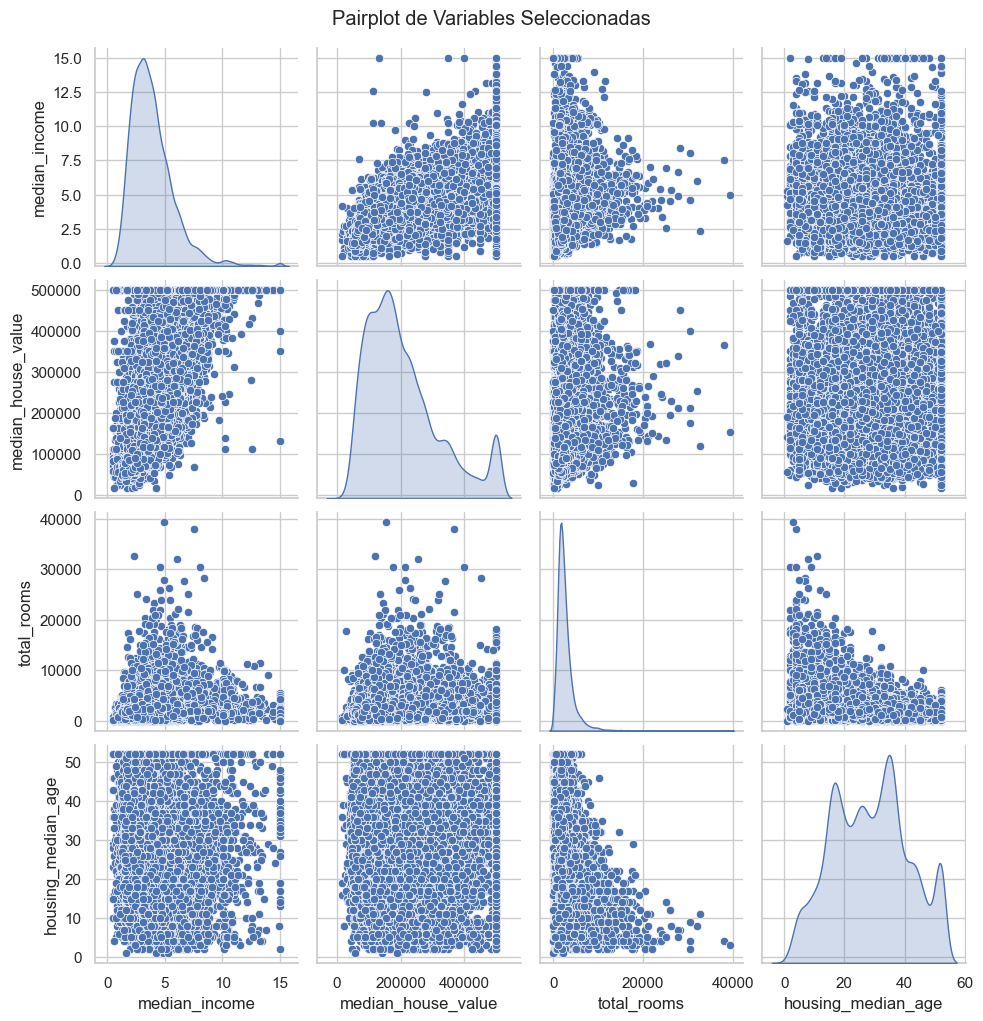

In [31]:
# Subconjunto de datos para el pairplot
subset = df[['median_income', 'median_house_value', 'total_rooms', 'housing_median_age']]

# Crear un Pairplot
sns.pairplot(subset, diag_kind="kde")
plt.suptitle("Pairplot de Variables Seleccionadas", y=1.02)
plt.show()


# Conclusiones

# Conclusiones

Después de un análisis exhaustivo de los datos del mercado inmobiliario en California, hemos identificado varios factores clave que influyen significativamente en los precios de las viviendas:

1. **Ubicación y Proximidad al Océano:**
   * Las propiedades ubicadas cerca del mar ("NEAR BAY", "NEAR OCEAN" o "ISLAND") muestran una prima significativa en sus precios
   * Esta tendencia es consistente en todas las regiones costeras de California
   * Las propiedades tierra adentro ("INLAND") tienden a ser considerablemente más económicas

2. **Ingresos Medianos del Vecindario:**
   * Existe una fuerte correlación positiva entre los ingresos medianos del área y los valores de las propiedades
   * Las zonas con ingresos medianos superiores a 7.5 muestran valores de vivienda significativamente más altos
   * La distribución de ingresos muestra una concentración en los niveles medios y bajos, con menor proporción de áreas de ingresos muy altos

3. **Características de la Propiedad:**
   * El número total de habitaciones muestra una correlación positiva con el valor de la propiedad
   * Sorprendentemente, la antigüedad de la vivienda (housing_median_age) tiene una influencia menor en el precio
   * Se observa una concentración significativa de propiedades cerca del límite de precio de $500,000

4. **Patrones de Distribución:**
   * La distribución de precios muestra una clara segmentación por zonas geográficas
   * Se observa un efecto de "techo" en los precios cerca de los $500,000, sugiriendo posibles limitaciones en los datos o políticas de precio
   * Las áreas costeras muestran una mayor variabilidad en los precios

**Recomendaciones para Inversores:**
* Las mejores oportunidades de inversión podrían encontrarse en:
  - Áreas costeras emergentes que aún no han alcanzado su precio máximo
  - Vecindarios con tendencias de incremento en los ingresos medianos
  - Propiedades más grandes (mayor número de habitaciones) en áreas con potencial de apreciación

**Consideraciones Adicionales:**
* Es importante tener en cuenta factores no incluidos en este análisis como:
  - Tendencias de desarrollo urbano
  - Cambios en la infraestructura local
  - Factores económicos regionales
  - Regulaciones de zonificación y desarrollo

Esta análisis proporciona una base sólida para la toma de decisiones en inversiones inmobiliarias en California, aunque se recomienda complementar con investigación adicional específica de cada ubicación de interés.